In [ ]:
import pandas as pd
import numpy as np
import csv

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

from matplotlib import pyplot as plt


from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Input
from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("train.csv", sep=';')
data_train.head()

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [ ]:
data_test = pd.read_csv("test.csv", sep=';')
data_test.head()

,Unnamed: 0,title,text,label
0,0,"Live from New York, it's a Trump-Clinton remat...",NEW YORK (Reuters) - Veteran actor and frequen...,1
1,1,Catalan separatists to lose majority in tight ...,BARCELONA (Reuters) - Catalonia s independence...,1
2,2,North Carolina governor concedes election to D...,"WINSTON-SALEM, N.C. (Reuters) - North Carolina...",1
3,3,Draft Senate Iran legislation sets tough new U...,WASHINGTON (Reuters) - Draft legislation respo...,1
4,4,California governor taps U.S. Representative B...,"SACRAMENTO, Calif. (Reuters) - California Gove...",1


In [ ]:
#combinované title z testovacích a trenovacích
data_train_com = pd.concat([data_train, data_test]).reset_index()

In [ ]:
data_train_com['content'] = data_train['title']# + data_train['text']

In [ ]:
data_train_com = data_train_com.drop(columns=['Unnamed: 0'])


In [ ]:
data_train_com.head()

,label,content
0,1,Palestinians switch off Christmas lights in Be...
1,1,China says Trump call with Taiwan president wo...
2,0,FAIL! The Trump Organization’s Credit Score W...
3,1,Zimbabwe military chief's China trip was norma...
4,0,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...


In [ ]:
len(data_train_com)

32470

In [ ]:
data_train_com.shape

(32470, 2)

In [ ]:
SAMPLE = False

In [ ]:
if SAMPLE:
  data_train = data_train.sample(1000)

In [ ]:
# Inicializace tokenizátoru -> u tokenizátoru probíhá k základním úpravám (normalizace), jako všechno malým, filtry atd.
tokenizer = Tokenizer(num_words=5000)
# nafitovat na našich datech -> vytvoříme tokeny
tokenizer.fit_on_texts(data_train_com["content"])

In [ ]:
# převod textů na sekvence (zakódování)
X = tokenizer.texts_to_sequences(data_train_com["content"])

In [ ]:
# příklad jak se zakóduje text do sekvence
data_train["content"].iloc[1]

"China says Trump call with Taiwan president won't change island's status"

In [ ]:
# první slovo - index 535, druhé slovo index 936
pd.DataFrame(X).iloc[1]

,1
0,72.0
1,13.0
2,2.0
3,214.0
4,14.0
5,877.0
6,34.0
7,761.0
8,305.0
9,1925.0


In [ ]:
# pod indexe 535 najdeme 'advice', pod indexem 936 najdeme 'talk'
tokenizer.word_index

{'to': 1,
 'trump': 2,
 'in': 3,
 'of': 4,
 'for': 5,
 'on': 6,
 'video': 7,
 'the': 8,
 'u': 9,
 's': 10,
 'a': 11,
 'and': 12,
 'says': 13,
 'with': 14,
 'is': 15,
 'after': 16,
 'at': 17,
 'as': 18,
 'house': 19,
 'obama': 20,
 'over': 21,
 'by': 22,
 'from': 23,
 'about': 24,
 'his': 25,
 'new': 26,
 'watch': 27,
 'not': 28,
 'white': 29,
 'clinton': 30,
 'will': 31,
 'hillary': 32,
 'just': 33,
 'president': 34,
 'trump’s': 35,
 'be': 36,
 'russia': 37,
 'he': 38,
 'it': 39,
 'bill': 40,
 'republican': 41,
 'this': 42,
 'out': 43,
 'north': 44,
 'election': 45,
 'that': 46,
 'up': 47,
 'state': 48,
 'court': 49,
 'senate': 50,
 'korea': 51,
 'who': 52,
 'are': 53,
 'no': 54,
 'donald': 55,
 'against': 56,
 'vote': 57,
 'has': 58,
 'him': 59,
 'calls': 60,
 'tax': 61,
 'was': 62,
 'you': 63,
 'republicans': 64,
 'her': 65,
 'gop': 66,
 'news': 67,
 'campaign': 68,
 'media': 69,
 "trump's": 70,
 'more': 71,
 'china': 72,
 'may': 73,
 'police': 74,
 'how': 75,
 'deal': 76,
 'black': 

Text(0, 0.5, 'Počet textů')

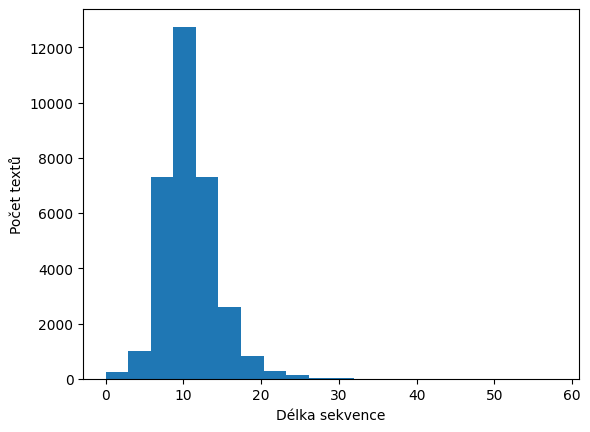

In [ ]:
# Získání délek sekvencí
lengths = [len(seq) for seq in X]

# Histogram délek sekvencí
plt.hist(lengths, bins=20)
plt.xlabel('Délka sekvence')
plt.ylabel('Počet textů')

In [ ]:
# když bych měl dlouhé texty tak zaříznu pomocí max_len
# do neuronky, musíme pořád dávat stejně velká data na vstupu
# trochu zmenšíme data na vstupu, podle histogramu to není moho řádků, kde texty jsou delší než 55 tokenů
maxlen = 30
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
# 1 Fake, 0 No Fake
y = data_train_com["label"]
y.value_counts()

,count
label,
1,17610
0,14860


In [ ]:
y = to_categorical(y)
y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Vytvoření modelu
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=1000))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

# Kompilace modelu
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, maxlen))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 30, 128)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,802 (2.79 MB)

 Trainable params: 731,802 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early = EarlyStopping(monitor='val_accuracy',
    min_delta=0.005,
    patience=5,
    mode='auto',
    restore_best_weights=True,
    start_from_epoch=0
)

save = ModelCheckpoint(
    "best_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
)

In [ ]:
# Trénování modelu
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early, save])

Epoch 1/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 69s 79ms/step - accuracy: 0.8756 - loss: 0.2900 - val_accuracy: 0.9403 - val_loss: 0.1534
Epoch 2/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 79s 76ms/step - accuracy: 0.9627 - loss: 0.1002 - val_accuracy: 0.9418 - val_loss: 0.1565
Epoch 3/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9760 - loss: 0.0689 - val_accuracy: 0.9399 - val_loss: 0.1767
Epoch 4/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 84s 78ms/step - accuracy: 0.9824 - loss: 0.0496 - val_accuracy: 0.9389 - val_loss: 0.1993
Epoch 5/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 66s 81ms/step - accuracy: 0.9845 - loss: 0.0354 - val_accuracy: 0.9362 - val_loss: 0.2448
Epoch 6/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 79s 77ms/step - accuracy: 0.9897 - loss: 0.0281 - val_accuracy: 0.9398 - val_loss: 0.3015


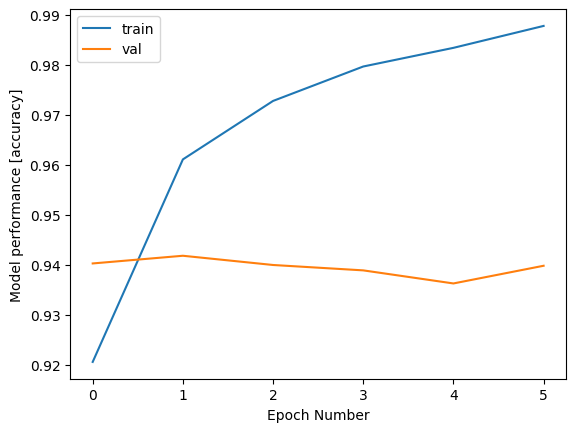

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Model performance [accuracy]")
plt.legend()
plt.show()

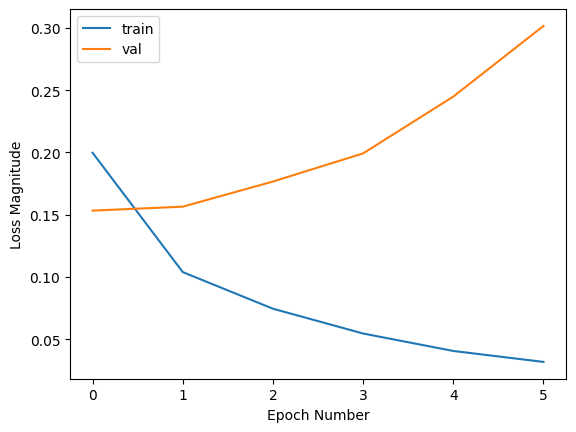

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.legend()
plt.show()